In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import player_formatter as formatter
import styler

In [2]:
background_color = styler.background_color()
axis_color = styler.axis_color()
label_color = styler.label_color()
signature_color = styler.signature_color()
annotation_color = styler.annotation_color()
font_size = 20

In [3]:
team = 'Chelsea'

In [4]:
df = pd.read_csv(f'Data/xG/{team}.csv')

## Select Data

In [5]:
competitions = ['Premier League']
num_games = 5

In [22]:
y_axis_label = "Expected Goals (xG)"
x_axis_label = "Match Number"
graph_title = f"Rolling {num_games} game average expected Goals for and against - {team}"

source = "Fbref.com"

annotation_labels = [
    "2019/20 - Lampard",
    "2020/21 - Lampard",
    "Tuchel",
    f"Source:\n{source}"
]
annotation_points = [(7,2.4),(32+10-num_games,2.4),(50+10-num_games,2.4),(5,0.1)]

signature_point = (5,0.3)

tick_frequency = 5
#horizontal_lines = [min_y_val]
vertical_lines = [38-num_games,38-num_games+20]

## Setup

In [14]:
def format_df(df):
    df = df[df['Comp'].isin(competitions)]
    df = df.sort_values(by=['Date'])
    df = df[['Date', 'Round', 'GF', 'GA', 'xG', 'xGA']]
    return df

In [15]:
formatted_df = format_df(df)

In [16]:
gameweeks = formatted_df['Round'].str.rsplit(expand=True)[1].values
gameweeks = gameweeks[(num_games-len(gameweeks)):][::tick_frequency]

In [17]:
def get_rolling_averages(values):
    rolling_averages = []
    for i in range(num_games,len(values)):
        ave = sum(values[i-num_games:i])/num_games
        rolling_averages.append(round(ave,2))
    return rolling_averages

In [18]:
xg_for = get_rolling_averages(formatted_df['xG'])
xg_against = get_rolling_averages(formatted_df['xGA'])

## Graph

<ipython-input-23-01a8dd183ee6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(gameweeks)


Text(5, 0.3, 'Nihaal George\n@CarefreeNihaal')

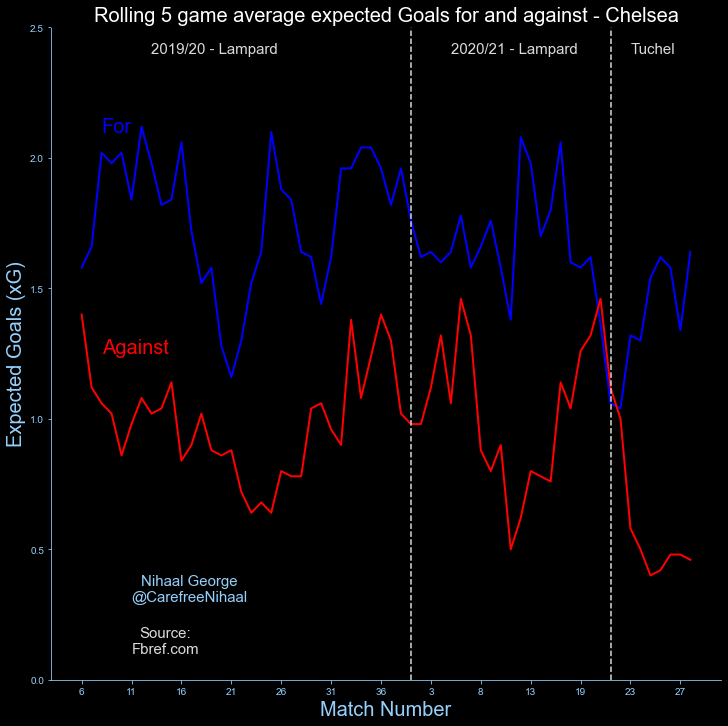

In [23]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlabel(x_axis_label, size = font_size)
ax.set_ylabel(y_axis_label, size = font_size)
ax.set_title(graph_title, color=label_color, size = font_size)

fig = styler.set_styles_fig(fig)
ax = styler.set_styles_ax(ax)

ax.set_xticklabels(gameweeks)

plt.xticks(np.arange(0, len(xg_for), tick_frequency))

plt.plot( xg_for, data=df, marker='', color='blue', linewidth=2)
plt.plot( xg_against, data=df, marker='', color='red', linewidth=2)

ax.annotate("For", (2,2.1), color='blue', size=font_size)
ax.annotate("Against", (2,1.25), color='red', size=font_size)

plt.ylim(0,2.5)
plt.rcParams["font.family"] = "Arial"

for v in vertical_lines:
    plt.axvline(x=v, color=annotation_color, linestyle='--')

for i in range(len(annotation_labels)):
    ax.annotate(annotation_labels[i], annotation_points[i], color=annotation_color, ma='center', size = 15)

ax.annotate("Nihaal George\n@CarefreeNihaal", signature_point, color=signature_color, ma='center', size = 15)